# Finescale structure and spiciness

This notebook is motivated by the lack of eddy stirring signal in the CTD-χpod A05 dataset. One possibility is that the error bounds on χ are too large. But if we assumed the χ data were perfect, is there a way to tell whether we expect to see a "scale-transformation term" in the microscale variance budget?

Another motivation for this is that some latitude lines in the NATRE budget show a larger residual than others. 
1. What is the difference? 
1. And is there some sign of that difference in the finescale structure? 
    1. Greater along-isopycnal std(S) and std(T)?
    1. Greater variance of T_z, S_z at injection scales?
    1. ^ these two should be connected...
  
Also Ferrari & Polzin:
 
 > In regions where temperature variance production is dominated by turbulence, one expects to find smooth T–S profiles with wiggles only at small scales. In regions where temperature variance production is dominated by eddy stirring, one expects T–S profiles to exhibit structure at the finescale.
 
 
I'm thinking that this should be visible in vertical wavenumber spectra of $T,S$ or even $T_z, S_z$
  


In [6]:
from IPython.display import Image

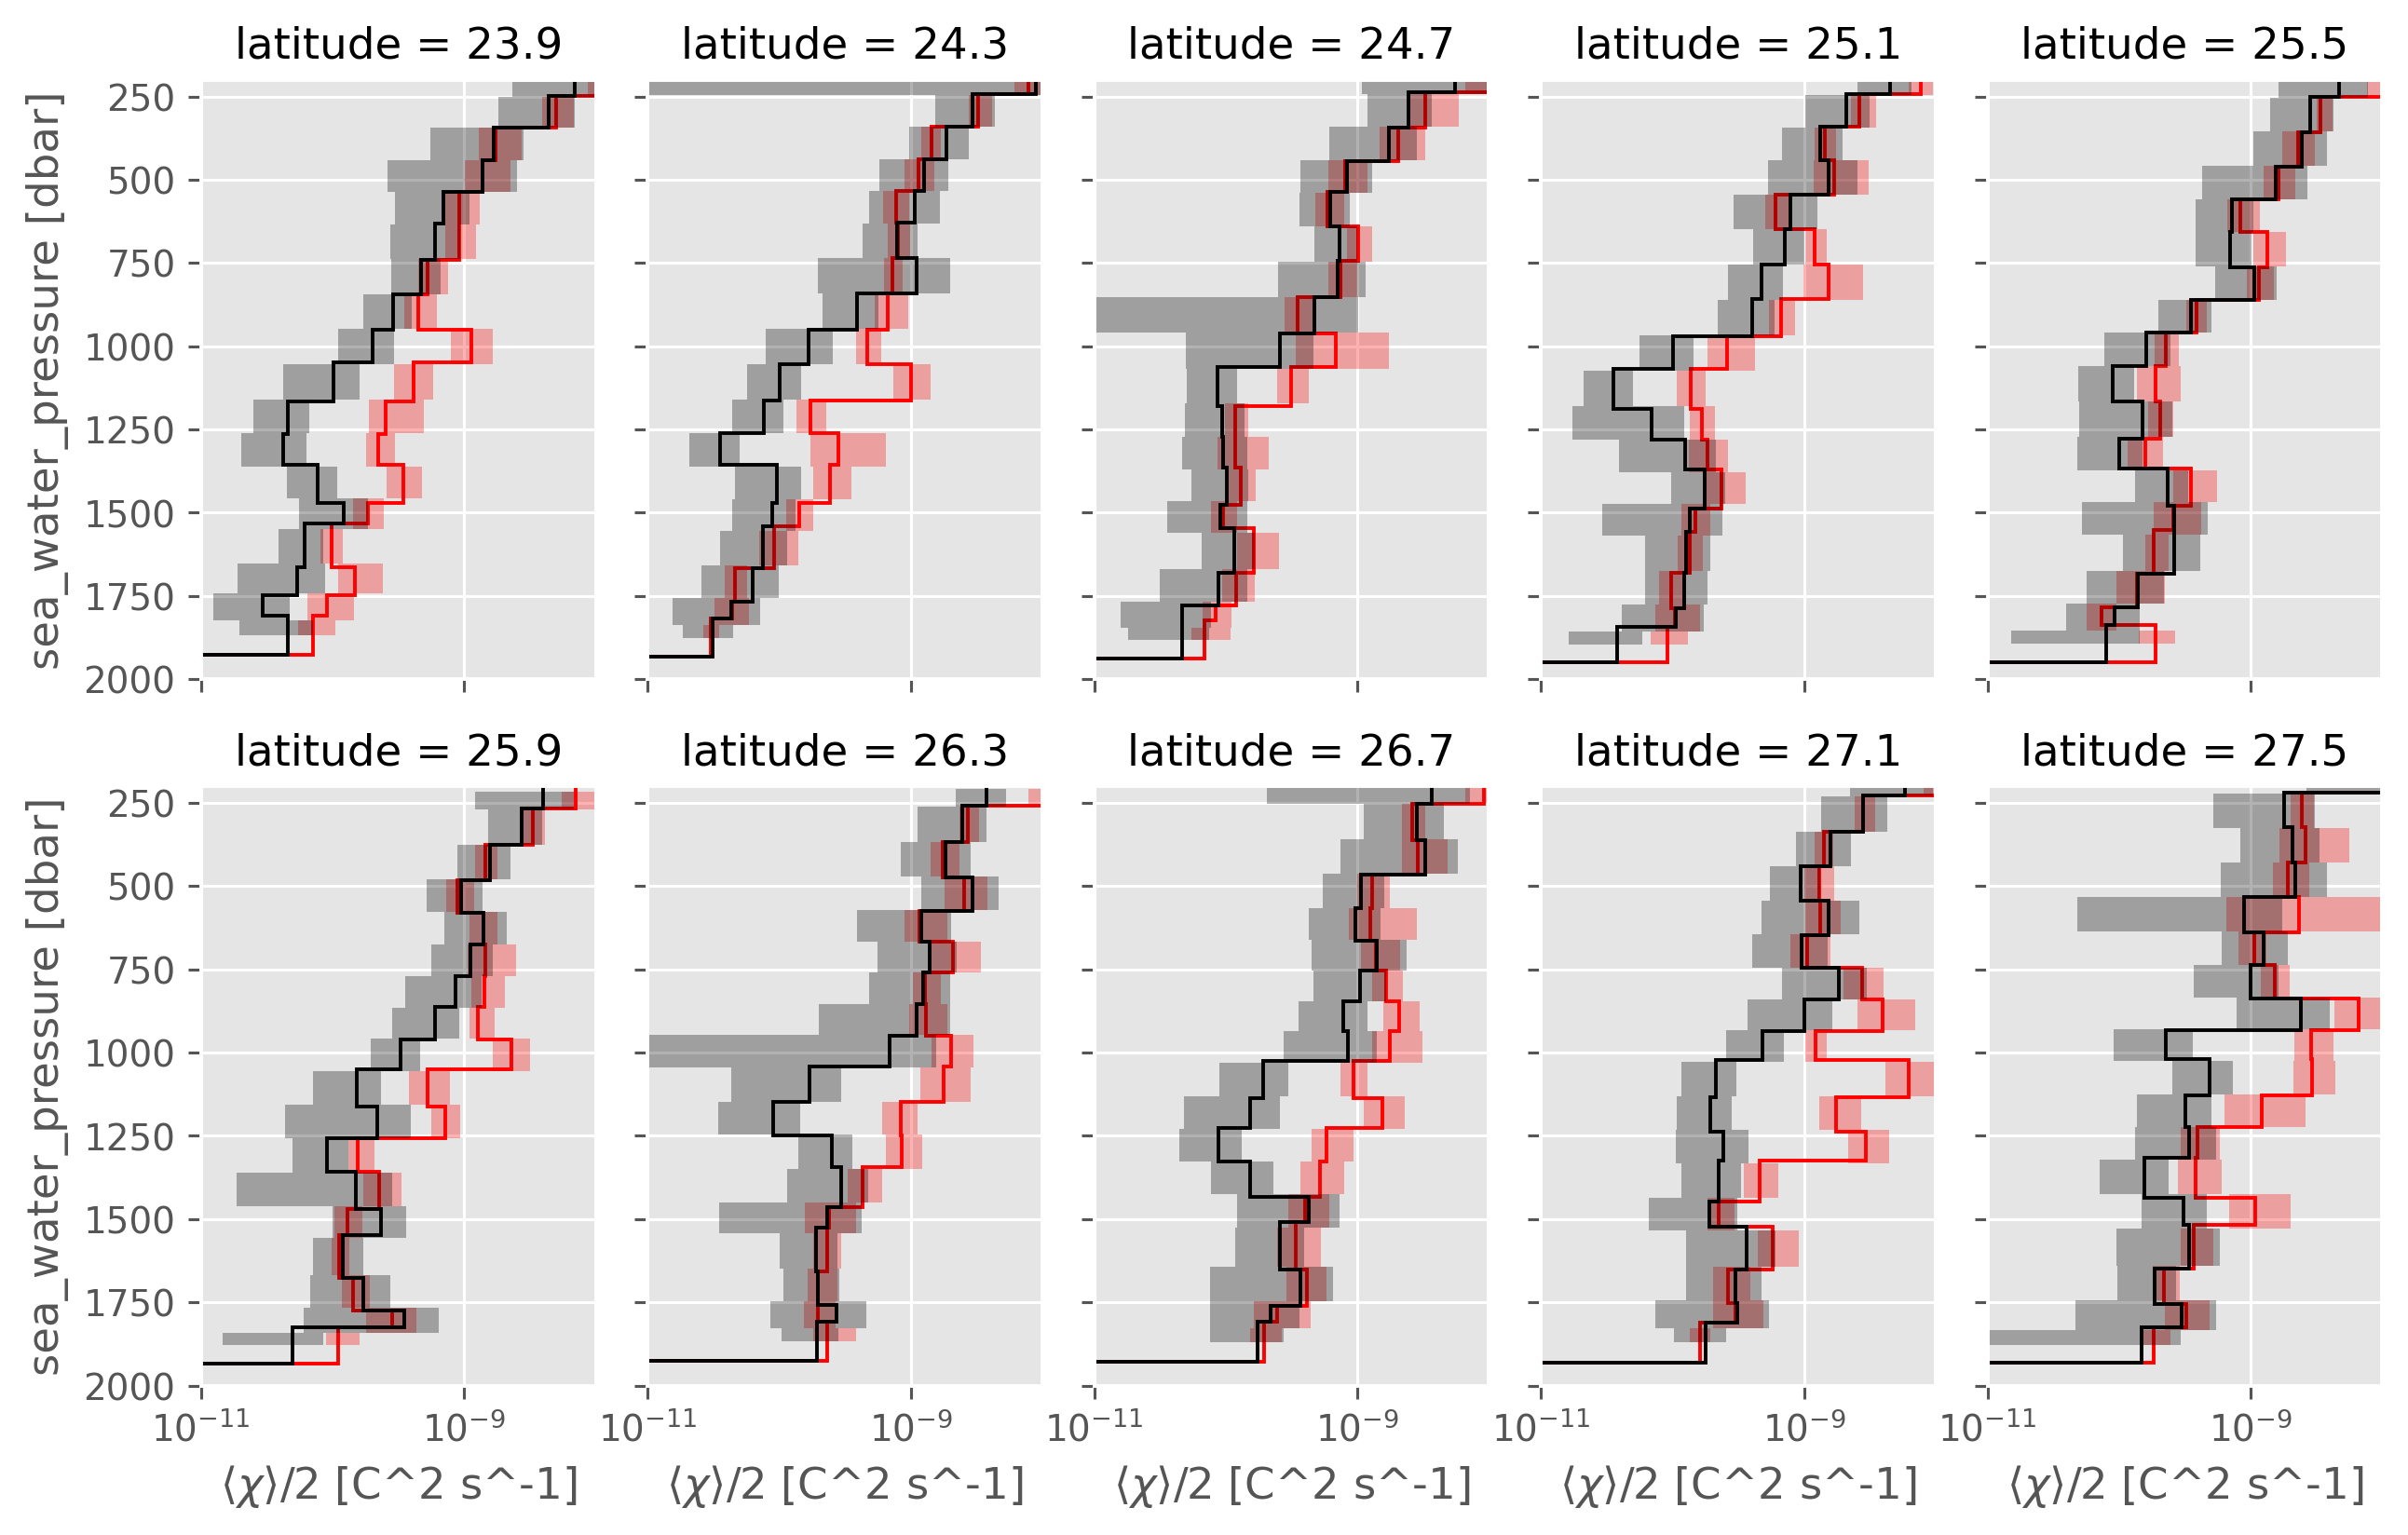

In [7]:
Image("../images/natre-budget-lat-lines.png", width=800)

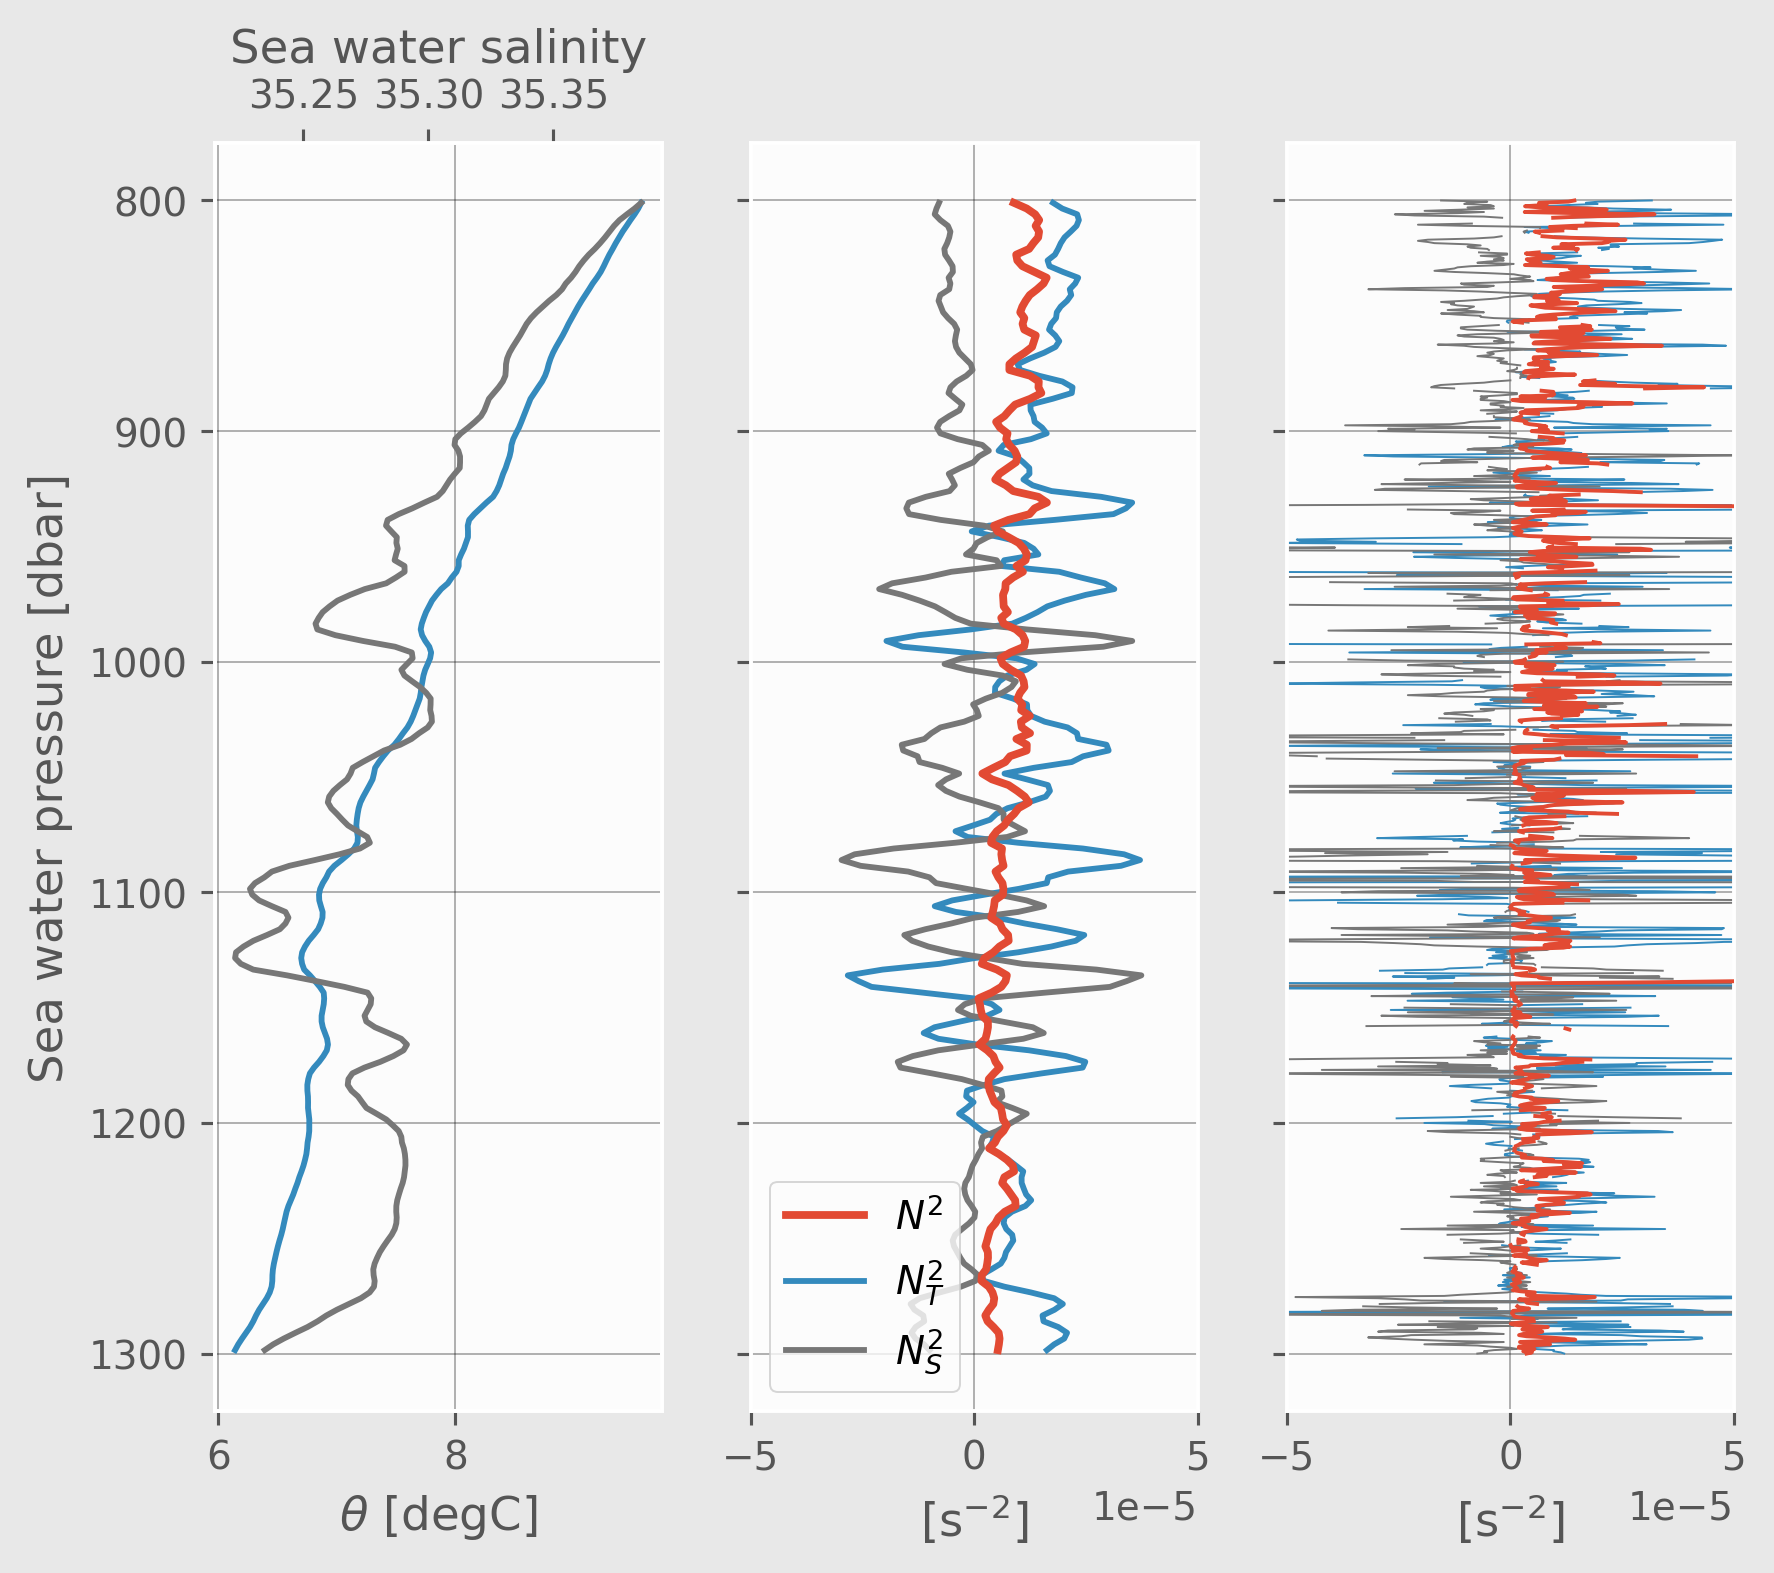

In [5]:
Image("../images/natre-strat-across-scales.png", width=600)

## Read data

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
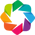

holoviews  : 1.14.6
hvplot     : 0.7.3
numpy      : 1.22.0
tqdm       : 4.62.3
matplotlib : 3.5.1
dcpy       : 0.1
cf_xarray  : 0.6.4.dev14+g9b4d1e0.d20220121
pint_xarray: 0.2.1
flox       : 0.3.1.dev13+g74cc5eb.d20220104
xarray     : 0.20.3.dev137+g3f3a197c8
eddydiff   : 0.1
gsw        : 3.4.0
pandas     : 1.3.5
xgcm       : 0.6.0
distributed: 2021.12.0
cmocean    : 2.0
scipy      : 1.7.3



<xarray.DataArray (dim_0: 1)>
array([1.])
Dimensions without coordinates: dim_0

In [8]:
%load_ext watermark
%matplotlib inline

import glob
import os

import cf_xarray as cfxr
import cf_xarray.units
import cmocean as cmo
import dcpy
import distributed
import flox
import gsw
import holoviews as hv
import hvplot.xarray
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pint_xarray
import scipy as sp
import tqdm
import xgcm
from cf_xarray.units import units
from IPython.display import Image

import eddydiff as ed
import xarray as xr

units.default_format = "~P"
xr.set_options(keep_attrs=True, use_flox=True)

plt.rcParams["figure.dpi"] = 140
plt.rcParams["savefig.dpi"] = 200
plt.style.use("ggplot")


hv.extension("bokeh")
%watermark -iv
xr.DataArray([1.0])

In [9]:
natre = ed.natre.read_natre()

In [25]:
natre.load()

<xarray.Dataset>
Dimensions:     (latitude: 10, longitude: 10, pres: 6180)
Coordinates:
  * latitude    (latitude) float64 27.5 27.1 26.7 26.3 ... 25.1 24.7 24.3 23.9
  * longitude   (longitude) float64 -30.7 -30.3 -29.8 ... -27.6 -27.2 -26.8
  * pres        (pres) float64 10.0 10.5 11.0 ... 3.098e+03 3.099e+03 3.1e+03
    time        (latitude, longitude) datetime64[ns] 1992-03-28T15:28:59.9999...
    depth       (latitude, longitude, pres) float64 nan nan nan ... nan nan nan
Data variables: (12/16)
    chi         (latitude, longitude, pres) float64 nan nan nan ... nan nan nan
    eps         (latitude, longitude, pres) float64 nan nan nan ... nan nan nan
    salt        (latitude, longitude, pres) float64 nan nan nan ... nan nan nan
    temp        (latitude, longitude, pres) float64 nan nan nan ... nan nan nan
    gamma_n     (latitude, longitude, pres) float64 nan nan nan ... nan nan nan
    SA          (latitude, longitude, pres) float64 nan nan nan ... nan nan nan
    ...          ...
    chi_masked  (latitude, longitude, pres) float64 nan nan nan ... nan nan nan
    Krho        (latitude, longitude, pres) float64 nan nan nan ... nan nan nan
    KrhoTz      (latitude, longitude, pres) float64 nan nan nan ... nan nan nan
    eps_chi     (latitude, longitude, pres) float64 nan nan nan ... nan nan nan
    Kt          (latitude, longitude, pres) float64 nan nan nan ... nan nan nan
    KtTz        (latitude, longitude, pres) float64 nan nan nan ... nan nan nan
Attributes: (12/13)
    Conventions:           CF-1.6
    netcdf_version:        4
    project:               North Atlantic Tracer Release Experiment (NATRE)
    expocode:              32OC250_4
    cast_number:           3.0
    title:                 Microstructure profiler data from the ship Oceanus...
    ...                    ...
    latitude:              27.533166666666666
    longitude:             -30.723333333333333
    chief_scientist:       Raymond W. Schmitt
    data_originator:       Polzin
    institution:           WHOI
    data_assembly_center:  CCHDO

## T-S diagrams

27.1 definitely has more scatter along isopycnals.

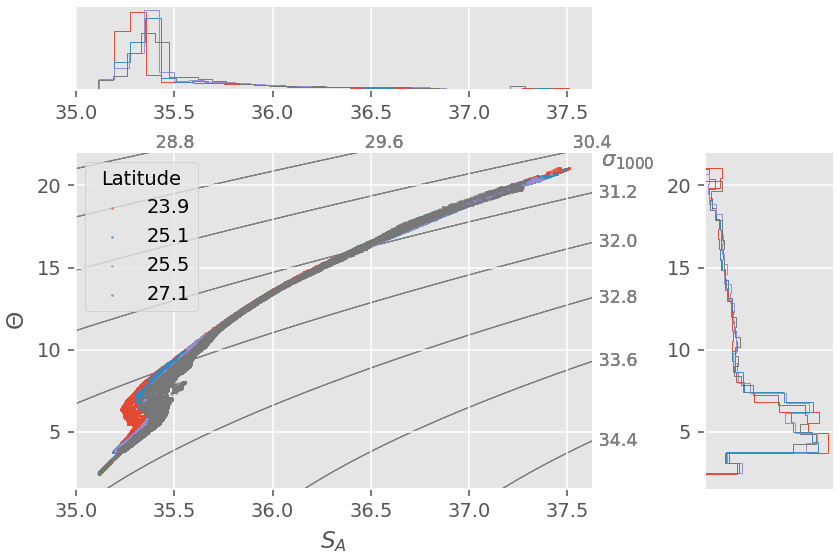

In [161]:
%matplotlib widget

kwargs = dict(
    Pref=1000,
    kind="scatter",
    size=1,
    # Tbins=np.arange(2, 20, 0.05),
    # Sbins=np.arange(35.2, 36, 0.01),
)
lat = 23.9
line = natre.sel(latitude=lat, method="nearest")
_, ax = dcpy.oceans.TSplot(line.SA, line.CT, plot_kwargs={"label": str(lat)}, **kwargs)
for lat in [25.1, 25.5, 27.1]:
    line = natre.sel(latitude=lat, method="nearest")
    dcpy.oceans.TSplot(
        line.SA, line.CT, plot_kwargs={"label": str(lat)}, **kwargs, ax=ax
    )
ax["ts"].legend(title="Latitude")

In [126]:
natre_lat_lines = xr.load_dataset("../datasets/natre-along-lat-lines.nc")
natre_lat_lines

<xarray.Dataset>
Dimensions:             (gamma_n: 18, bound: 2, latitude: 10)
Coordinates:
  * gamma_n             (gamma_n) float64 26.55 26.77 26.95 ... 27.95 27.96
  * bound               (bound) object 'lower' 'upper'
    num_obs             (latitude, gamma_n) int64 1598 1771 1859 ... 1116 1832
    pres                (latitude, gamma_n) float64 206.6 296.0 ... 1.879e+03
    reference_pressure  int64 1000
    gamma_n_bounds      (bound, gamma_n) float64 26.43 26.68 ... 27.95 27.97
  * latitude            (latitude) float64 23.9 24.3 24.7 ... 26.7 27.1 27.5
Data variables: (12/36)
    chi                 (latitude, gamma_n) float64 2.381e-08 ... 3.651e-10
    eps                 (latitude, gamma_n) float64 1.119e-09 ... 1.531e-10
    KtTz                (latitude, gamma_n) float64 2.803e-07 ... 2.73e-08
    hm                  (latitude, gamma_n) float64 85.8 93.1 ... 64.78 104.9
    theta               (latitude, gamma_n) float64 17.92 15.72 ... 4.669 4.418
    salt                (latitude, gamma_n) float64 36.61 36.18 ... 35.13 35.11
    ...                  ...
    δKρTz2              (latitude, gamma_n) float64 4.625e-09 ... 1.46e-10
    δKtTzTz             (latitude, gamma_n) float64 6.186e-09 ... 7.176e-11
    δresidual           (latitude, gamma_n) float64 5.319e-09 ... 3.682e-11
    δpres               (latitude, gamma_n) float64 42.9 46.55 ... 32.39 52.47
    chib2               (latitude, gamma_n) float64 1.191e-08 ... 1.825e-10
    chib2_err           (latitude, gamma_n, bound) float64 8.725e-09 ... 2.45...
Attributes: (12/14)
    Conventions:           CF-1.6
    netcdf_version:        4
    project:               North Atlantic Tracer Release Experiment (NATRE)
    expocode:              32OC250_4
    cast_number:           3.0
    title:                 Microstructure profiler data from the ship Oceanus...
    ...                    ...
    longitude:             -30.723333333333333
    chief_scientist:       Raymond W. Schmitt
    data_originator:       Polzin
    institution:           WHOI
    data_assembly_center:  CCHDO
    commit:                eddydiff: aebd9b9f3a82e2242f4ed80f18d6863f89a89690...

## Spiciness

### Simple standard deviation

Here is std(SA) and std(CT) calculated in O(100)m wide isopycnal bins.

1. The bump between 1500-2000m is interesting.
1. Some spatial gradient in the top 500m is showing up as high spiciness but it's not the signal I want 

I think this ties in to the last bit of Ferrari & Polzin (2005), their equation (6.7)
\begin{equation}
    K_ρ (∂_zθ_m)^2 +  K_e |∇_nθ_m|^2 = \frac12 ⟨χ⟩
\end{equation}

Taking the ratio of production terms
\begin{equation}
    \frac{K_ρ (∂_z θ_m)^2}{K_e |∇_n θ_m|^2} = \frac{K_ρ/K_e}{|∇_n θ_m|^2 / (∂_z θ_m)^2}
\end{equation}

Where the denominator is large relative to numerator we expect mesoscale stirring to dominate.

I'm thinking I might want to remove the estimate a vertical std of $T,S$ in each bin and then average that across casts. But how do I justify this?
 1. I guess this is like Cole calculating anomaly w.r.t mean S surface? that would take out the "large" scale lateral gradient.
 1. Taking smaller bins seems to help, then we are more likely to ignore mixing across closely spaced ρ surfaces.
    - Naveira Garabato et al (2013) use 0.02 kg/m^3 spaced bins
 1. Jaeger et al (2020) define spice "anomalies" relative to a median T-S profile.


Another justification is:
> Third, stirring tends to increase T–S variability, while turbulence mixes different water types along a straight line in T–S space, the mixing line

For a big enough bin, the mixing line can show up as std(T) or std(S)...

In [259]:
# bins = ed.sections.choose_bins(
#   natre.gamma_n, depth_range=np.arange(250, 2151, 20), decimals=3
# )
# Use uniformly spaced bins following Naveira Garabato et al (2013).
# They have 2bar casts and use 0.02kg/m3 bin spacing
bins = np.arange(26, 28, 0.02)
natre["pres_"] = natre.pres

iso = natre[["SA", "CT", "gamma_n"]].groupby_bins("gamma_n", bins)

iso_std = iso.std(["longitude", "pres"])
iso_std.coords["pres"] = (
    natre[["pres_", "gamma_n"]]
    .groupby_bins("gamma_n", bins)
    .mean(["longitude", "pres"])
)["pres_"]

/Users/dcherian/mambaforge/envs/eddydiff/lib/python3.9/site-packages/numpy_groupies/aggregate_numpy.py:156: RuntimeWarning: invalid value encountered in true_divide
  means = sums.astype(dtype) / counts
/Users/dcherian/mambaforge/envs/eddydiff/lib/python3.9/site-packages/numpy_groupies/aggregate_numpy.py:157: RuntimeWarning: invalid value encountered in true_divide
  ret = np.bincount(group_idx, (a - means[group_idx]) ** 2,


In [258]:
kwargs = dict(
    by="latitude",
    y="pres",
    legend=True,
    muted_alpha=0,
    aspect=1 / 2,
    frame_width=200,
    ylim=(1950, 250),
    grid=True,
    nonselection_alpha=0.25,
)
(iso_std.SA.hvplot.line(**kwargs) + iso_std.CT.hvplot.line(**kwargs)).opts(
    title="std along isopycnal surface"
)

:Layout
   .NdOverlay.I  :NdOverlay   [latitude]
      :Curve   [SA]   (pres)
   .NdOverlay.II :NdOverlay   [latitude]
      :Curve   [CT]   (pres)

There is some relationship between std(SA) (blue) and where we can see a residual. But the agreement isn't as clear as I would thin k:
1. 24.7
1. 26.3

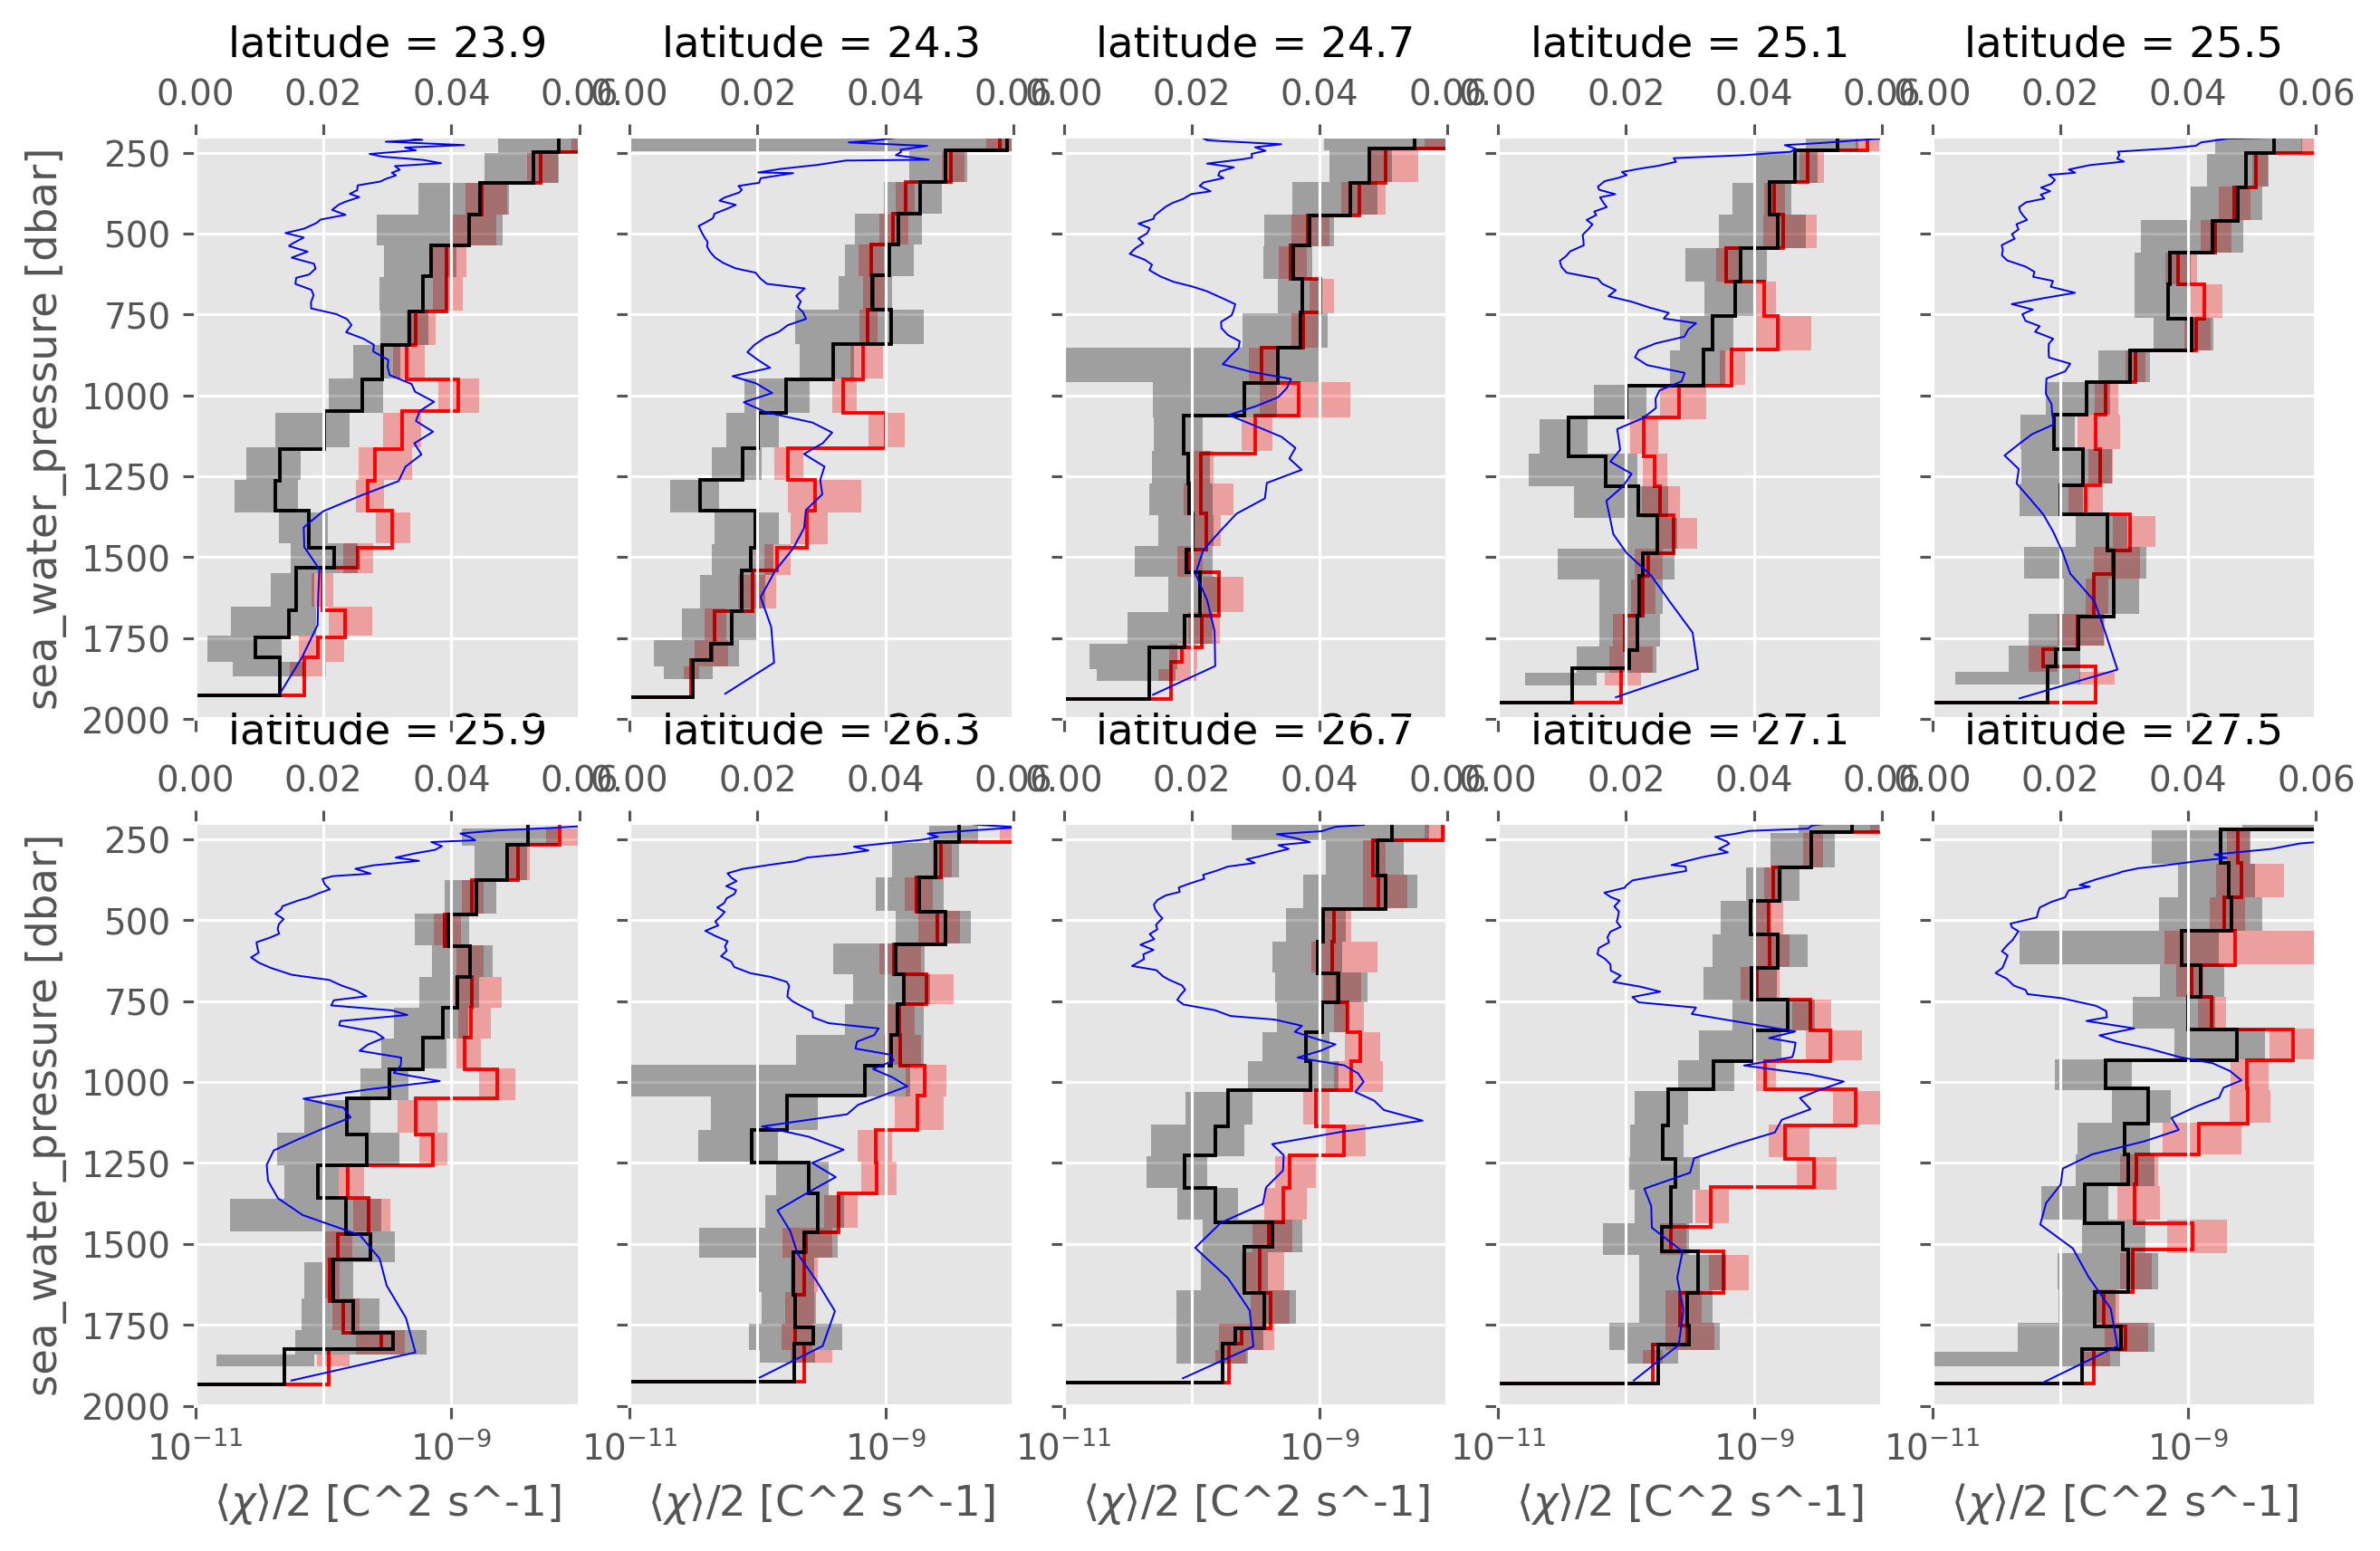

In [260]:
%matplotlib inline
plt.rcParams["figure.dpi"] = 140

fg = ed.natre.plot_lines(natre_lat_lines, col="latitude")
for loc, axis in zip(fg.name_dicts.ravel(), fg.axes.ravel()):
    ax2 = axis.twiny()
    iso_std.SA.sel(loc).plot(
        y="pres", ax=ax2, color="b", xlim=(0, 0.06), _labels=False, lw=0.5
    )
# plt.tight_layout()

### Referenced to median T-S

Chose to just use really finely spaced bins instead. I don't think the core story changes (i.e. some agreement between microscale variance budget residual and std(SA) along isopycnal).

In [249]:
ds = line
bins = np.arange(26, 28, 0.02)

median = ds[["SA", "CT", "gamma_n"]].groupby_bins("gamma_n", bins).median()

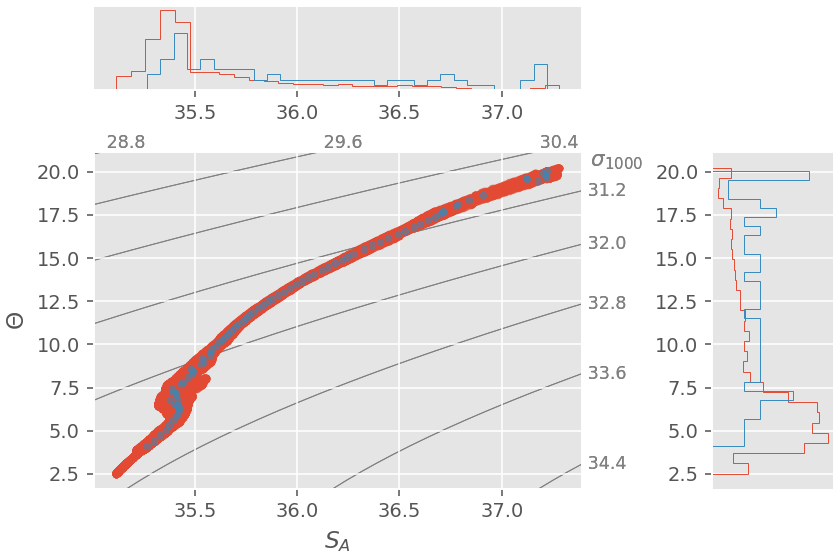

In [250]:
%matplotlib widget

_, ax = dcpy.oceans.TSplot(ds.SA, ds.CT, Pref=1000, kind="scatter")
dcpy.oceans.TSplot(median.SA, median.CT, Pref=1000, kind="scatter", ax=ax);

## Vertical wavenumber spectra

In [152]:
for label, group in iso:
    if label.left > 27.6:
        break

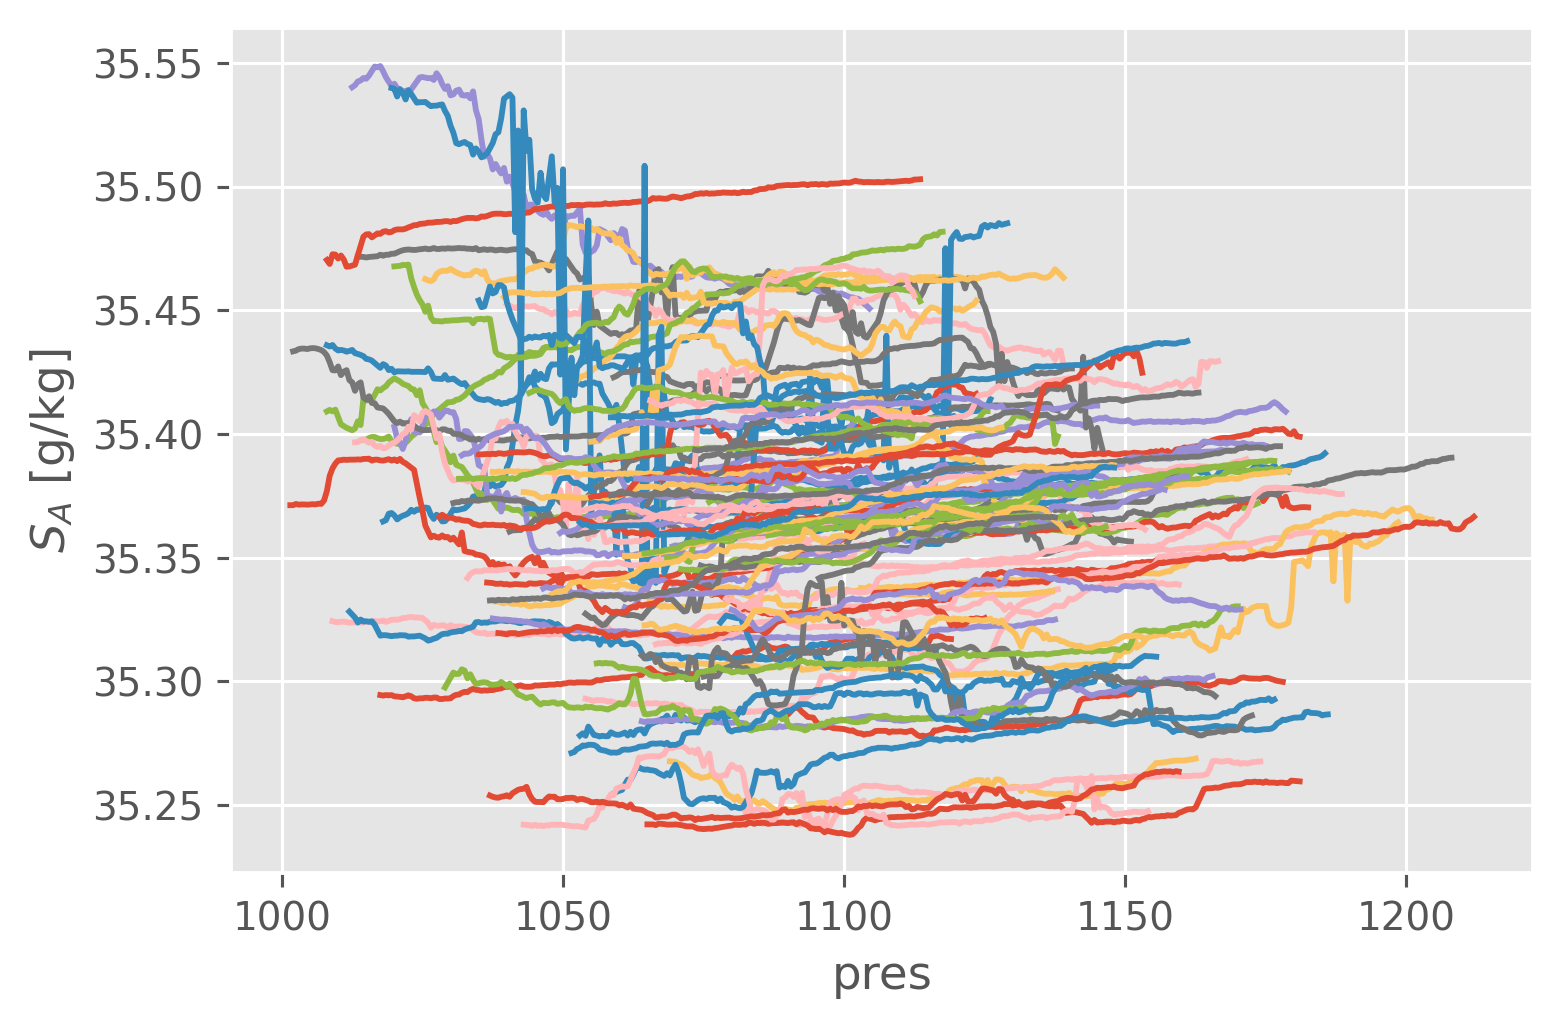

In [160]:
group.unstack().stack(cast=["latitude", "longitude"]).drop("cast").SA.sortby(
    "pres"
).interpolate_na("pres").plot(hue="cast", add_legend=False);